In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np

In [2]:
df=pd.read_csv("C:/5th SEM/ML/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_clean = df.copy()

In [7]:
imputer_age = SimpleImputer(strategy='median')
df_clean['Age'] = imputer_age.fit_transform(df_clean[['Age']])

In [9]:
df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0], inplace=True)

In [12]:
df_clean.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [17]:
df_encoded = df_clean.copy()
label_cols = ['Sex', 'Embarked', 'Pclass', 'Cabin']

In [18]:
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

In [19]:
df_encoded[label_cols].head()

,Sex,Embarked,Pclass,Cabin
0,1,2,2,147
1,0,0,0,81
2,0,2,2,147
3,0,2,0,55
4,1,2,2,147


In [20]:
scaler = StandardScaler()
scaled_cols = ['Age', 'Fare']
df_encoded[scaled_cols] = scaler.fit_transform(df_encoded[scaled_cols])

In [21]:
df_encoded[scaled_cols].head()

,Age,Fare
0,-0.565736,-0.502445
1,0.663861,0.786845
2,-0.258337,-0.488854
3,0.433312,0.420730
4,0.433312,-0.486337


In [23]:
df_encoded['age_bin'] = pd.cut(df_clean['Age'], bins=[0, 12, 18, 60, 100], 
                               labels=['Child', 'Teen', 'Adult', 'Senior'])

In [25]:
df_encoded['fare_bin'] = pd.qcut(df_clean['Fare'], q=4, labels=['Low', 'Mid', 'High', 'Very High'])

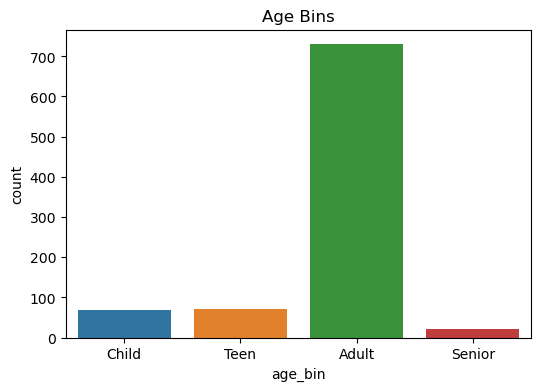

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(x='age_bin', data=df_encoded)
plt.title('Age Bins')
plt.show()

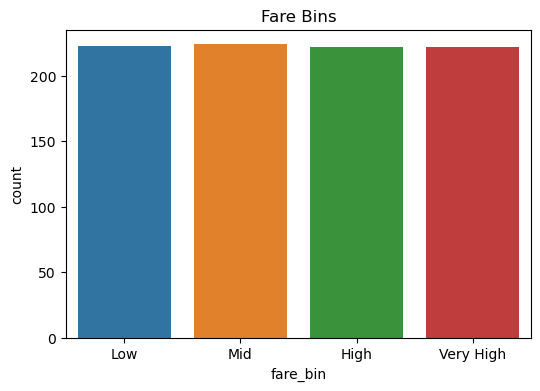

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(x='fare_bin', data=df_encoded)
plt.title('Fare Bins')
plt.show()

In [28]:
df_encoded.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin,fare_bin
0,1,0,2,"Braund, Mr. Owen Harris",1,-0.565736,1,0,A/5 21171,-0.502445,147,2,Adult,Low
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,1,0,PC 17599,0.786845,81,0,Adult,Very High
2,3,1,2,"Heikkinen, Miss. Laina",0,-0.258337,0,0,STON/O2. 3101282,-0.488854,147,2,Adult,Mid
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,113803,0.420730,55,2,Adult,Very High
4,5,0,2,"Allen, Mr. William Henry",1,0.433312,0,0,373450,-0.486337,147,2,Adult,Mid


In [29]:
df=pd.read_csv("C:/5th SEM/ML/tips.csv")

In [31]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [33]:
tips_enc = df.copy()
for col in ['sex', 'smoker', 'day', 'time']:
    tips_enc[col] = LabelEncoder().fit_transform(tips_enc[col])

In [34]:
scaler = StandardScaler()
tips_enc[['total_bill', 'tip', 'size']] = scaler.fit_transform(tips_enc[['total_bill', 'tip', 'size']])

In [36]:
tips_enc['bill_bin'] = pd.cut(df['total_bill'], bins=3, labels=['Low', 'Mid', 'High'])

In [37]:
norm_tips = df.copy()
norm_tips[['total_bill', 'tip']] = MinMaxScaler().fit_transform(norm_tips[['total_bill', 'tip']])

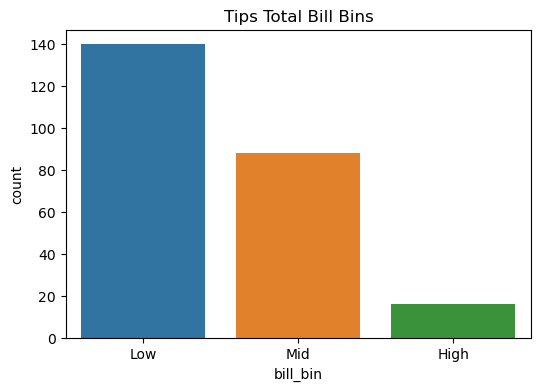

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(x='bill_bin', data=tips_enc)
plt.title("Tips Total Bill Bins")
plt.show()

In [39]:
df=pd.read_csv("C:/5th SEM/ML/flights.csv")

In [41]:
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [42]:
df.isnull().sum()

year          0
month         0
passengers    0
dtype: int64

In [47]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['month_encoded'] = df['month'].apply(lambda x: month_order.index(x) + 1)

In [49]:
df[['month', 'month_encoded']].head()

,month,month_encoded
0,January,1
1,February,2
2,March,3
3,April,4
4,May,5


In [50]:
scaler = StandardScaler()
df['passengers_scaled'] = scaler.fit_transform(df[['passengers']])

In [51]:
minmax = MinMaxScaler()
df['passengers_norm'] = minmax.fit_transform(df[['passengers']])

In [52]:
df['passenger_bin'] = pd.qcut(df['passengers'], q=4, labels=['Low', 'Mid', 'High', 'Very High'])

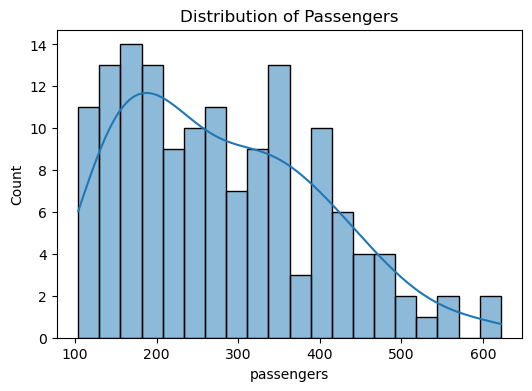

In [53]:
plt.figure(figsize=(6, 4))
sns.histplot(df['passengers'], bins=20, kde=True)
plt.title("Distribution of Passengers")
plt.show()

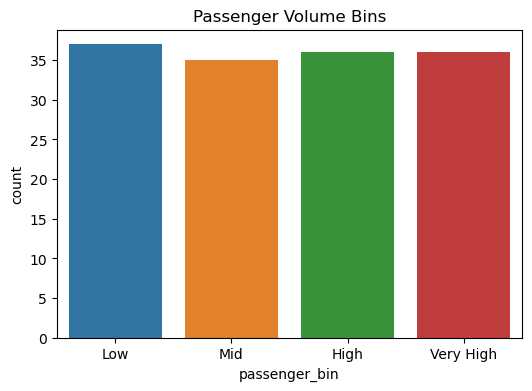

In [54]:
plt.figure(figsize=(6, 4))
sns.countplot(x='passenger_bin', data=df)
plt.title("Passenger Volume Bins")
plt.show()

In [55]:
df.head()

,year,month,passengers,month_encoded,passengers_scaled,passengers_norm,passenger_bin
0,1949,January,112,1,-1.407779,0.015444,Low
1,1949,February,118,2,-1.357590,0.027027,Low
2,1949,March,132,3,-1.240483,0.054054,Low
3,1949,April,129,4,-1.265578,0.048263,Low
4,1949,May,121,5,-1.332496,0.032819,Low
